In [2]:
# install fredapi, plotly
%pip install fredapi plotly --quiet 



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 

# set up style for plt
plt.style.use('fivethirtyeight')

# set max column to 500
pd.options.display.max_columns = 500


# add a color pallete
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

# import fredapi 
from fredapi import Fred 

# set env requirements
from dotenv import find_dotenv, load_dotenv
import os 

load_dotenv(find_dotenv())

# set secret key
FRED_API_KEY = os.getenv('FRED_API_KEY')




## Step 1. Creaete Fred Object and Search for Sample Dataset

In [4]:
# create fred object
fred = Fred(api_key=FRED_API_KEY)

# search for a sample dataset
fred.search('S&P')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2023-02-01,2023-02-01,S&P 500,2013-02-04,2023-02-01,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-02-01 19:10:48-06:00,84,The observations for the S&P 500 represent the...
VXVCLS,VXVCLS,2023-02-01,2023-02-01,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2023-01-31,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-02-01 08:36:09-06:00,54,"Copyright, 2016, Chicago Board Options Exchang..."
VXOCLS,VXOCLS,2023-02-01,2023-02-01,CBOE S&P 100 Volatility Index: VXO (DISCONTINUED),1986-01-02,2021-09-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2021-09-24 08:36:03-05:00,37,This series is no longer being updated by the ...
CSUSHPINSA,CSUSHPINSA,2023-02-01,2023-02-01,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-01-31 08:01:02-06:00,91,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2023-02-01,2023-02-01,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-01-31 08:01:04-06:00,83,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDM01VEA156NWDB,DDDM01VEA156NWDB,2023-02-01,2023-02-01,Stock Market Capitalization to GDP for Bolivar...,1993-01-01,2002-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-08-04 09:48:14-05:00,2,Total value of all listed shares in a stock ma...
DDDM01ESA156NWDB,DDDM01ESA156NWDB,2023-02-01,2023-02-01,Stock Market Capitalization to GDP for Spain,1975-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:24:07-05:00,2,Total value of all listed shares in a stock ma...
DDDM01KZA156NWDB,DDDM01KZA156NWDB,2023-02-01,2023-02-01,Stock Market Capitalization to GDP for Kazakhstan,1998-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:31:11-05:00,2,Total value of all listed shares in a stock ma...


In [5]:
# customize the search option
sp_search = fred.search('S&P', order_by='popularity', sort_order='desc')

sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-02-01,2023-02-01,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-01-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-01 09:06:07-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-02-01,2023-02-01,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-01-31 08:01:02-06:00,91,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-02-01,2023-02-01,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-01-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-01 09:06:11-06:00,84,This data represents the effective yield of th...
SP500,SP500,2023-02-01,2023-02-01,S&P 500,2013-02-04,2023-02-01,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-02-01 19:10:48-06:00,84,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2023-02-01,2023-02-01,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-01-31 08:01:04-06:00,83,"For more information regarding the index, plea..."


## Step 2. Download the Raw Data


In [6]:
# get data series with id 'SP500'
fred.get_series(series_id='SP500')

2013-02-04    1495.71
2013-02-05    1511.29
2013-02-06    1512.12
2013-02-07    1509.39
2013-02-08    1517.93
               ...   
2023-01-26    4060.43
2023-01-27    4070.56
2023-01-30    4017.77
2023-01-31    4076.60
2023-02-01    4119.21
Length: 2608, dtype: float64

## Step 3. Plot the Series

<AxesSubplot:>

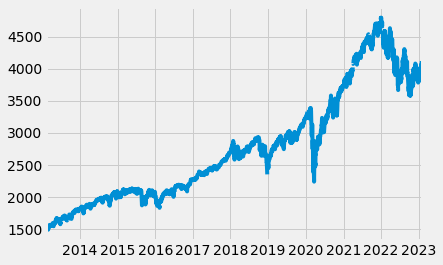

In [7]:
sp500 = fred.get_series(series_id='SP500')

sp500.plot()

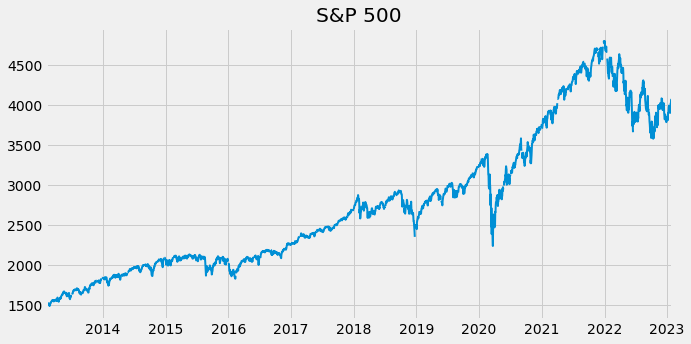

In [8]:
# style the plot
sp500.plot(figsize=(10,5),
            title='S&P 500',
            lw=2
)

plt.show()

## Step 4. Join Multiple Data Series

### Task: Find Unemployment Data

In [9]:
fred.search('unemployment')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-02-01,2023-02-01,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:03-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-02-01,2023-02-01,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-01-06 07:43:28-06:00,56,The unemployment rate represents the number of...
NROU,NROU,2023-02-01,2023-02-01,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,67,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2023-02-01,2023-02-01,Unemployment Level,1948-01-01,2022-12-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-01-06 07:43:24-06:00,68,The series comes from the 'Current Population ...
CCSA,CCSA,2023-02-01,2023-02-01,Continued Claims (Insured Unemployment),1967-01-07,2023-01-14,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-01-26 07:33:05-06:00,73,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRUN24TTUSA156N,LRUN24TTUSA156N,2023-02-01,2023-02-01,Unemployment Rate: Aged 15-24: All Persons for...,1960-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-01-13 11:52:37-06:00,1,OECD descriptor ID: LRUN24TT OECD unit ID: ST ...
LRUN64TTKRA156S,LRUN64TTKRA156S,2023-02-01,2023-02-01,Unemployment Rate: Aged 15-64: All Persons for...,2000-01-01,2021-01-01,Annual,A,Percent,%,Seasonally Adjusted,SA,2022-09-14 15:43:51-05:00,1,OECD descriptor ID: LRUN64TT OECD unit ID: STS...
LRUN64TTKRM156N,LRUN64TTKRM156N,2023-02-01,2023-02-01,Unemployment Rate: Aged 15-64: All Persons for...,1999-06-01,2022-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-01-13 11:41:47-06:00,1,OECD descriptor ID: LRUN64TT OECD unit ID: ST ...


In [10]:
# explore sample data - ie 'UNRATE' series that is seasonally-adjusted & monthly
fred.get_series(series_id='UNRATE')

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-08-01    3.7
2022-09-01    3.5
2022-10-01    3.7
2022-11-01    3.6
2022-12-01    3.5
Length: 900, dtype: float64

<AxesSubplot:>

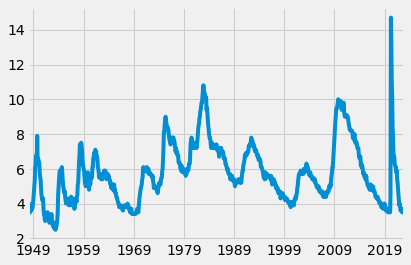

In [11]:
# plot the UNRATE series
unemp_rate = fred.get_series(series_id='UNRATE')
unemp_rate.plot()

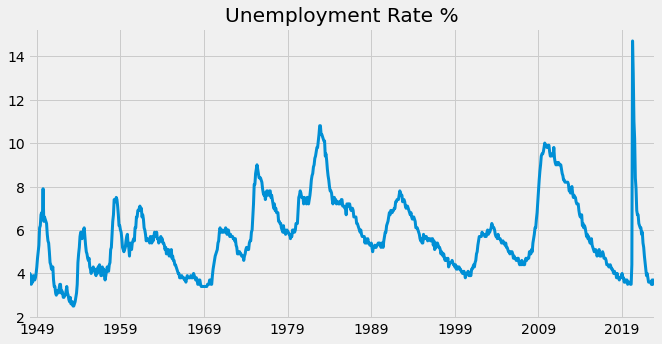

In [12]:
# style plot
unemp_rate.plot(figsize=(10,5),
                title='Unemployment Rate %',
                lw=3)
plt.show()

### Task: Search for State-Specific Unemployment Data - i.e., Texas

In [13]:
# further narrow the search to Monthly data
fred.search('unemployment state texas', filter=('frequency', 'Monthly'))

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
TXUR,TXUR,2023-02-01,2023-02-01,Unemployment Rate in Texas,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:03-06:00,48,None
TXURN,TXURN,2023-02-01,2023-02-01,Unemployment Rate in Texas,1976-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-01-25 08:26:21-06:00,11,None
AUST448URN,AUST448URN,2023-02-01,2023-02-01,"Unemployment Rate in Austin-Round Rock, TX (MSA)",1990-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-01 10:07:02-06:00,30,None
HOUS448URN,HOUS448URN,2023-02-01,2023-02-01,Unemployment Rate in Houston-The Woodlands-Sug...,1990-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-01 10:07:02-06:00,29,None
DALL148URN,DALL148URN,2023-02-01,2023-02-01,Unemployment Rate in Dallas-Fort Worth-Arlingt...,1990-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-01 10:07:03-06:00,28,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN481430000000005,LAUCN481430000000005,2023-02-01,2023-02-01,"Employed Persons in Erath County, TX",1990-01-01,2022-12-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2023-02-01 10:16:56-06:00,1,These data come from the Current Population Su...
LAUCN484410000000005,LAUCN484410000000005,2023-02-01,2023-02-01,"Employed Persons in Taylor County, TX",1990-01-01,2022-12-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2023-02-01 10:14:24-06:00,1,These data come from the Current Population Su...
LAUCN480590000000005,LAUCN480590000000005,2023-02-01,2023-02-01,"Employed Persons in Callahan County, TX",1990-01-01,2022-12-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2023-02-01 10:16:18-06:00,1,These data come from the Current Population Su...


### Task: Create a DF Consisting of Monthly Unemployment Data for States

In [21]:
unemp_df = fred.search('unemployment rate state').query('frequency == "Monthly" and units == "Percent" and \
                                            seasonal_adjustment == "Seasonally Adjusted"')

unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-02-01,2023-02-01,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:03-06:00,94,The unemployment rate represents the number of...
U6RATE,U6RATE,2023-02-01,2023-02-01,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:25-06:00,66,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2023-02-01,2023-02-01,Unemployment Rate - Black or African American,1972-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:26-06:00,64,The series comes from the 'Current Population ...
CAUR,CAUR,2023-02-01,2023-02-01,Unemployment Rate in California,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,57,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-02-01,2023-02-01,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,53,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LBSSA30,LBSSA30,2023-02-01,2023-02-01,Labor Force Participation Rate for Montana,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-24 09:01:10-06:00,8,A state's labor-force participation rate is th...
LBSSA16,LBSSA16,2023-02-01,2023-02-01,Labor Force Participation Rate for Idaho,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-24 09:01:08-06:00,7,A state's labor-force participation rate is th...
LBSSA02,LBSSA02,2023-02-01,2023-02-01,Labor Force Participation Rate for Alaska,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-24 09:01:12-06:00,7,A state's labor-force participation rate is th...


In [22]:
# explore the title
unemp_df['title']

series id
UNRATE                                              Unemployment Rate
U6RATE              Total Unemployed, Plus All Persons Marginally ...
LNS14000006             Unemployment Rate - Black or African American
CAUR                                  Unemployment Rate in California
M0892AUSM156SNBR                  Unemployment Rate for United States
                                          ...                        
LBSSA30                    Labor Force Participation Rate for Montana
LBSSA16                      Labor Force Participation Rate for Idaho
LBSSA02                     Labor Force Participation Rate for Alaska
LBSSA20                     Labor Force Participation Rate for Kansas
LNS14000093                            Unemployment Rate - 45-54 Yrs.
Name: title, Length: 153, dtype: object

In [23]:
# filter the df to inlclude only series that contain 'Unemployment Rate' 
unemp_df['title'].str.contains('Unemployment Rate')

series id
UNRATE               True
U6RATE              False
LNS14000006          True
CAUR                 True
M0892AUSM156SNBR     True
                    ...  
LBSSA30             False
LBSSA16             False
LBSSA02             False
LBSSA20             False
LNS14000093          True
Name: title, Length: 153, dtype: bool

In [25]:
# overwrite the df with new filter option
unemp_df = unemp_df.query('title.str.contains("Unemployment Rate")')
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-02-01,2023-02-01,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:03-06:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-02-01,2023-02-01,Unemployment Rate - Black or African American,1972-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:26-06:00,64,The series comes from the 'Current Population ...
CAUR,CAUR,2023-02-01,2023-02-01,Unemployment Rate in California,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,57,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-02-01,2023-02-01,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,53,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-02-01,2023-02-01,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,17,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000315,LNS14000315,2023-02-01,2023-02-01,Unemployment Rate - Married Women,1955-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:44:44-06:00,8,To obtain estimates of women worker employment...
LNS14200000,LNS14200000,2023-02-01,2023-02-01,Unemployment Rate Part-Time Workers,1968-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:44:41-06:00,8,The series comes from the 'Current Population ...
CSOUUR,CSOUUR,2023-02-01,2023-02-01,Unemployment Rate in South Census Region,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:23-06:00,7,None


In [35]:
unemp_df[['id', 'title']].head(20)

,id,title
series id,,
UNRATE,UNRATE,Unemployment Rate
LNS14000006,LNS14000006,Unemployment Rate - Black or African American
CAUR,CAUR,Unemployment Rate in California
M0892AUSM156SNBR,M0892AUSM156SNBR,Unemployment Rate for United States
M0892BUSM156SNBR,M0892BUSM156SNBR,Unemployment Rate for United States
LNS14000031,LNS14000031,"Unemployment Rate - 20 Yrs. & over, Black or A..."
FLUR,FLUR,Unemployment Rate in Florida
LNS14000024,LNS14000024,Unemployment Rate - 20 Yrs. & over
U2RATE,U2RATE,Unemployment Rate - Job Losers (U-2)


### Based on id description, it seems that state-specific series follow this naming convention: 
- `state abbreviation + UR` - i.e., TXUR for Texas

In [33]:
# filter titles based on index name length being 4 characters long
unemp_df.query('index.str.len() == 4')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-02-01,2023-02-01,Unemployment Rate in California,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,57,None
FLUR,FLUR,2023-02-01,2023-02-01,Unemployment Rate in Florida,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,50,None
TXUR,TXUR,2023-02-01,2023-02-01,Unemployment Rate in Texas,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:03-06:00,48,None
NYUR,NYUR,2023-02-01,2023-02-01,Unemployment Rate in New York,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:02-06:00,48,None
OHUR,OHUR,2023-02-01,2023-02-01,Unemployment Rate in Ohio,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:04-06:00,40,None
MIUR,MIUR,2023-02-01,2023-02-01,Unemployment Rate in Michigan,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,34,None
ALUR,ALUR,2023-02-01,2023-02-01,Unemployment Rate in Alabama,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:03-06:00,34,None
NCUR,NCUR,2023-02-01,2023-02-01,Unemployment Rate in North Carolina,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:10-06:00,26,None
NJUR,NJUR,2023-02-01,2023-02-01,Unemployment Rate in New Jersey,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:13-06:00,21,None


In [36]:
# the Dataframe is indexed based on the Series Id value, which we need to pass 
# into fred.get_series() under `series_id` argument 
# as done earlier for unemp_rate

for sid in unemp_df.index:
    if len(sid) == 4:
        state_data = fred.get_series(series_id=sid)
        break # only retrieve the first series for testing purposes

# check the result
state_data


1976-01-01    9.2
1976-02-01    9.2
1976-03-01    9.1
1976-04-01    9.1
1976-05-01    9.0
             ... 
2022-08-01    4.1
2022-09-01    3.8
2022-10-01    4.0
2022-11-01    4.1
2022-12-01    4.1
Length: 564, dtype: float64

In [37]:
# convert the result to a df
state_data.to_frame()

,0
1976-01-01,9.2
1976-02-01,9.2
1976-03-01,9.1
1976-04-01,9.1
1976-05-01,9.0
...,...
2022-08-01,4.1
2022-09-01,3.8
2022-10-01,4.0
2022-11-01,4.1


In [38]:
# pass in the optional name parameter 
# remember that sid object is pointing to the index name
state_data.to_frame(name=sid)

,CAUR
1976-01-01,9.2
1976-02-01,9.2
1976-03-01,9.1
1976-04-01,9.1
1976-05-01,9.0
...,...
2022-08-01,4.1
2022-09-01,3.8
2022-10-01,4.0
2022-11-01,4.1
